<a href="https://colab.research.google.com/github/gauravguptagtm/deep-learning-notebook/blob/main/DL_6(Churn_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [81]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim=11))
model.add(Dense(11, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [82]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 3)                 36        
                                                                 
 dense_17 (Dense)            (None, 11)                44        
                                                                 
 dense_18 (Dense)            (None, 1)                 12        
                                                                 
Total params: 92 (368.00 Byte)
Trainable params: 92 (368.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [84]:
history = model.fit(X_train_scaled, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
200/200 [==============================] - 2s 6ms/step - loss: 0.5121 - accuracy: 0.7934 - val_loss: 0.4944 - val_accuracy: 0.7987
Epoch 2/25
200/200 [==============================] - 1s 6ms/step - loss: 0.4973 - accuracy: 0.7934 - val_loss: 0.4836 - val_accuracy: 0.7987
Epoch 3/25
200/200 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7934 - val_loss: 0.4695 - val_accuracy: 0.7987
Epoch 4/25
200/200 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.7934 - val_loss: 0.4546 - val_accuracy: 0.7987
Epoch 5/25
200/200 [==============================] - 0s 2ms/step - loss: 0.4577 - accuracy: 0.7934 - val_loss: 0.4410 - val_accuracy: 0.7987
Epoch 6/25
200/200 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7934 - val_loss: 0.4314 - val_accuracy: 0.7987
Epoch 7/25
200/200 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7934 - val_loss: 0.4256 - val_accuracy: 0.7987
Epoch 

In [75]:
import matplotlib.pyplot as plt

In [85]:
history.history

{'loss': [0.5121289491653442,
  0.49729496240615845,
  0.4856260418891907,
  0.47155430912971497,
  0.45774585008621216,
  0.4461272954940796,
  0.43809813261032104,
  0.43337786197662354,
  0.43040865659713745,
  0.4284202456474304,
  0.4271104335784912,
  0.4259415566921234,
  0.42475008964538574,
  0.4238516688346863,
  0.4229162633419037,
  0.42219749093055725,
  0.42141830921173096,
  0.4208080768585205,
  0.42006605863571167,
  0.4193783700466156,
  0.4188169836997986,
  0.41826847195625305,
  0.4177858829498291,
  0.4170840084552765,
  0.4165288805961609],
 'accuracy': [0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.80078125,
  0.807812511920929,
  0.8134375214576721,
  0.8153125047683716,
  0.8184375166893005,
  0.8170312643051147,
  0.8176562786102295,
  0.8185937404632568,
  0.8196874856948853,
  0.8206250071525574,
  0.8217187523841858,
  0.82171

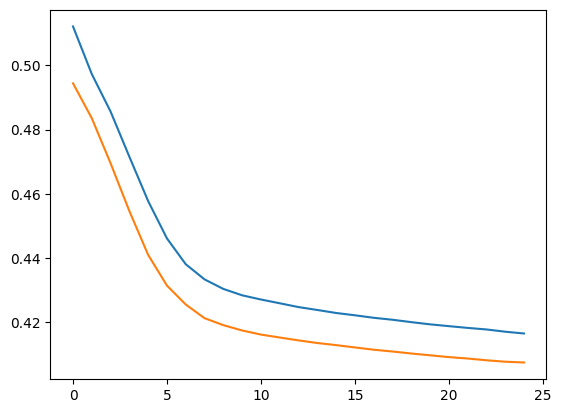

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

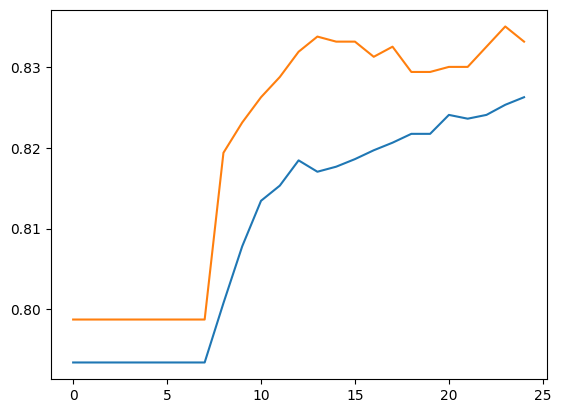

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [66]:
model.layers[0].get_weights()

[array([[-0.27554956, -0.23340544,  0.52996254],
        [-0.4226783 , -1.0892767 , -0.5052042 ],
        [-0.13260962, -0.21616971,  0.35170123],
        [-0.6688415 , -0.171718  ,  0.06275839],
        [ 0.14559951,  0.01302082,  0.02797865],
        [ 0.00358108,  0.11345372, -0.14422385],
        [ 0.38930348,  0.29739907,  0.16433203],
        [ 0.5126564 , -0.00173287, -0.40236548],
        [-0.32098636,  0.22523579, -0.72150993],
        [-0.5547979 ,  0.49477693, -0.48004732],
        [ 0.29329863,  0.18046603,  0.37652412]], dtype=float32),
 array([0.19405778, 0.63754684, 0.29172602], dtype=float32)]

In [67]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 2ms/step


In [68]:
y_pred = np.where(y_log>0.5,1,0)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test, y_pred)

0.8035